## Logistic regression example 1

- 타이타닉 데이터로 로지스틱 회귀분석 연습.
- 데이터를 통해 성별, 나이, 객실 등급이 승객의 생존에 어떤 영향을 끼쳤는지 분석.
- 참고.http://jy93630.blog.me/220442325857

In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [2]:
df = pd.read_csv("data/train2.csv") # 데이터 읽기 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
cols_to_keep = ['Survived', 'Age', 'Fare'] # 분류할 수 없는 컬럼들

In [4]:
# 분류할 수 있는 컬럼들은 더미 컬럼를 만든다.
dummy_Pclass = pd.get_dummies(df['Pclass'], prefix='Pclass')
dummy_Sex = pd.get_dummies(df['Sex'], prefix='Sex')
print(dummy_Pclass.head(5))
print(dummy_Sex.head(5))

   Pclass_1  Pclass_2  Pclass_3
0         0         0         1
1         1         0         0
2         0         0         1
3         1         0         0
4         0         0         1
   Sex_female  Sex_male
0           0         1
1           1         0
2           1         0
3           1         0
4           0         1


In [5]:
# 더미를 데이터에 이어 붙인다.
data = df[cols_to_keep].join(dummy_Pclass.ix[:,'Pclass_2':]) # Pclass_2 부터 이어 붙임. 이래야 분석에 편리함
data = data.join(dummy_Sex.ix[:,'Sex_male':]) # Sex_male만 이어 붙임
print(dummy_Sex.head(5))

   Sex_female  Sex_male
0           0         1
1           1         0
2           1         0
3           1         0
4           0         1


In [6]:
data['intercept'] = 1.0

In [7]:
# 지금까지의 데이터 확인
data.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,intercept
0,0,22.0,7.2500,0,1,1,1.0
1,1,38.0,71.2833,0,0,0,1.0
2,1,26.0,7.9250,0,1,0,1.0
3,1,35.0,53.1000,0,0,0,1.0
4,0,35.0,8.0500,0,1,1,1.0


In [8]:
# logistic regression
train_cols = data.columns[1:] # train_cols는 설명 변수
logit = sm.Logit(data['Survived'], data[train_cols]) # Survived는 목적 변수

In [9]:
# fit the model
result = logit.fit() 

Optimization terminated successfully.
         Current function value: 0.451818
         Iterations 6


In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Fri, 28 Jul 2017   Pseudo R-squ.:                  0.3215
Time:                        17:23:45   Log-Likelihood:                -402.57
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.853e-80
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Age           -0.0330      0.007     -4.457      0.000        -0.048    -0.019
Fare           0.0007      0.002      0.340      0.734        -0.003     0.005
Pclass_2      -1.0809      0.286     -3.778      0.000        -1.642    -0.520
Pclass_3      -2.2794      0.280     -8.142      0.000        -2.828    -1.731
Sex_male      -2.6049      0.188    -13.881      0.000        -2.973    -2.237
intercept      3.4772      0.418      8.318      0.000         2.658     4.297
==============================================================================
"""

In [11]:
# odds ratios only
np.exp(result.params) # 오즈 비(Odds Ratio) 출력

Age           0.967515
Fare          1.000714
Pclass_2      0.339281
Pclass_3      0.102351
Sex_male      0.073911
intercept    32.367967
dtype: float64

In [12]:
#최종결과, predict가 생존확률임.
data["predict"] = result.predict(data[train_cols])
data.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,intercept,predict
0,0,22.0,7.2500,0,1,1,1.0,0.106363
1,1,38.0,71.2833,0,0,0,1.0,0.906625
2,1,26.0,7.9250,0,1,0,1.0,0.585365
3,1,35.0,53.1000,0,0,0,1.0,0.913663
4,0,35.0,8.0500,0,1,1,1.0,0.071945


## Logistic regression example 2
- gpa, gre, 모교 우선순위(prestige)가 대학원 입학 여부에 어떻게 영향을 끼치는가?

In [13]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [14]:
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv") # 데이터 읽기
print(df.head())

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [15]:
df.columns = ["admit", "gre", "gpa", "prestige"] # df의 column 이름 바꾸기
print(df.columns)

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')


In [16]:
df.describe() # 빈도수, 평균, 분산, 최솟값, 최댓값, 1/4분위수, 중위값, 1/4분위수를 나타냄

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [17]:
df.std() # 분산 출력

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64

In [18]:
# 크로스탭 출력
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


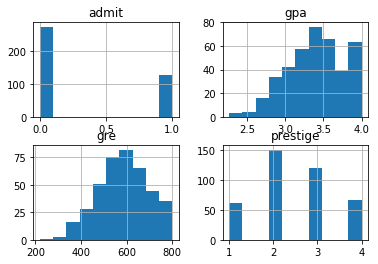

In [19]:
df.hist()
pl.show() 
# pl.show()를 해야 화면에 띄워준다! 결과는 아래와 같다. 
# 모든 컬럼에 대해 히스토그램을 그림

In [20]:
# 더미코딩
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [21]:
#create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [22]:
data['intercept'] = 1.0

In [23]:
train_cols = data.columns[1:]
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Fri, 28 Jul 2017   Pseudo R-squ.:                 0.08292
Time:                        17:23:48   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038         0.000     0.004
gpa            0.8040      0.332      2.423      0.015         0.154     1.454
prestige_2    -0.6754      0.316     -2.134      0.033        -1.296    -0.055
prestige_3    -1.3402      0.345     -3.881      0.000        -2.017    -0.663
prestige_4    -1.5515      0.418     -3.713      0.000        -2.370    -0.733
intercept     -3.9900      1.140     -3.500      0.000        -6.224    -1.756
==============================================================================
"""

### 결과

coef에 주목한다. gre:0.0023 gpa :0.840, prestige_2 : -0.6754 등등...
coef(편회귀계수)의 값이 양수이면 그 컬럼의 값이 커질수록 목적변수가 TRUE일 확률 즉, admit=1일 확률이 높아진다.
반대로 coef의 값이 음수이면 그 컬럼의 값이 커질수록 목적변수가 FALSE일 확률 즉, admin=0일 확률이 높아진다.

GRE나 GPA가 커질수록 대학원에 입학할 확률은 커지고 prestige_2, prestige_3이 커질수록 대학원에 입학할 확률은 작아진다.  이러한 경향은 pretige가 낮아질수록 심해진다.

### 실습예제 
로지스틱 회귀분석을 통해 오즈(odds)값을 확인하고 흑인과 백인이라는 인종정보가 사형선고를 받는데 영향을 주었는지 확인하시오

    <데이터 설명>
    * Agg : 범죄의 심각도 지수(1~6의 값이며 클수록 심각한 범죄)
    * Vrace : 피의자의 인종(백인이면 1, 흑인이면 0)
    * DEATH : 사형선고 여부

In [24]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import statsmodels.formula.api as smf

In [25]:
df = pd.read_csv('data/DeathPenalty.csv') # 데이터 읽기 
df.head(5)


,Agg,VRace,Death
0,1,1,1
1,1,1,1
2,1,1,0
3,1,1,0
4,1,1,0


In [26]:
df.columns[0:1]

Index(['Agg'], dtype='object')

In [27]:
# logistic regression
train_cols = df.columns[1:2] # train_cols는 설명 변수
logit = sm.Logit(df['Death'], df[train_cols]) # Death 목적 변수

In [28]:
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.675869
         Iterations 4


In [29]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  Death   No. Observations:                  362
Model:                          Logit   Df Residuals:                      361
Method:                           MLE   Df Model:                            0
Date:                Fri, 28 Jul 2017   Pseudo R-squ.:                 -0.5202
Time:                        17:23:48   Log-Likelihood:                -244.66
converged:                       True   LL-Null:                       -160.94
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
VRace         -0.6360      0.184     -3.450      0.001        -0.997    -0.275


In [30]:
# odds ratios only
np.exp(result.params) # 오즈 비(Odds Ratio) 출력

VRace    0.529412
dtype: float64

In [31]:
result.params

VRace   -0.635989
dtype: float64

In [32]:
from patsy import dmatrices
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

# sklearn output
model = LogisticRegression(fit_intercept = False, C = 1e9)
y, X = dmatrices('Death ~ Agg+VRace', df, return_type = 'dataframe')
mdl = model.fit(X, y)
print(np.exp(model.coef_))
print(model.coef_)

# sm
logit = sm.Logit(df['Death'], df[train_cols])
a = logit.fit(disp=0)
print(a.summary())
print(np.exp(a.params))

[[  1.26096112e-03   4.66292675e+00   6.11412935e+00]]
[[-6.67588106  1.53964331  1.81060238]]
                           Logit Regression Results                           
Dep. Variable:                  Death   No. Observations:                  362
Model:                          Logit   Df Residuals:                      361
Method:                           MLE   Df Model:                            0
Date:                Fri, 28 Jul 2017   Pseudo R-squ.:                 -0.5202
Time:                        17:23:48   Log-Likelihood:                -244.66
converged:                       True   LL-Null:                       -160.94
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
VRace         -0.6360      0.184     -3.450      0.001        -0.997    -0.275
VRace    0.529412
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
